# RENEWIFY 
### Machine Learning in Global Energy Sustainability

__________

Name : Manish Subhash Vankudre

## Web Scraping

In [1]:
# importing libraries

import wikipedia as wp
import wikipediaapi
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive_output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


The below code uses the Wikipedia API to fetch the text content of Wikipedia pages. It defines a function, `fetch_wikipedia_html_content`, that retrieves the content of a specified Wikipedia page. The titles for pages on carbon dioxide emissions and renewable electricity production are used to fetch their respective contents.

In [2]:
wiki_wiki = wikipediaapi.Wikipedia('Manish/RENEWIFY', 'en')

def fetch_wikipedia_html_content(title):
    try:
        page = wiki_wiki.page(title)
        if page.exists():
            html_content = page.text
            return html_content
        else:
            print(f"Page not found: {title}")
            return None
    except wikipediaapi.exceptions.HTTPTimeoutError as e:
        print(f"Timeout error: {e}")
        return None

co2_emissions_title = "List_of_countries_by_carbon_dioxide_emissions"
renewable_energy_title = "List_of_countries_by_renewable_electricity_production"

co2_emissions_html_content = fetch_wikipedia_html_content(co2_emissions_title)
renewable_energy_html_content = fetch_wikipedia_html_content(renewable_energy_title)

In [3]:
print(co2_emissions_html_content)

This is a list of sovereign states and territories by carbon dioxide emissions due to certain forms of human activity, based on the EDGAR database created by European Commission and Netherlands Environmental Assessment Agency. The following table lists the 1970, 1990, 2005, 2017 and 2022 annual CO2 emissions estimates (in kilotons of CO2 per year) along with a list of calculated emissions per capita (in tons of CO2 per year).The data only consider carbon dioxide emissions from the burning of fossil fuels and cement manufacture, but not emissions from land use, land-use change and forestry. Over the last 150 years, estimated cumulative emissions from land use and land-use change represent approximately one-third of total cumulative anthropogenic CO2 emissions. Emissions from international shipping or bunker fuels are also not included in national figures, which can make a large difference for small countries with important ports. 
In 2022, CO2 emissions from the top 10 countries with th

In [4]:
print(renewable_energy_html_content)

This is a list of countries and dependencies by electricity generation from renewable sources each year.
Renewables accounted for 28% of electric generation in 2021, consisting of hydro (55%), wind (23%), biomass (13%), solar (7%) and geothermal (1%). China produced 31% of global renewable electricity, followed by the United States (11%), Brazil (6.4%), Canada (5.4%) and India (3.9%).Renewable investment reached almost $500 billion globally in 2022, amounting to 83% of new electric capacity that year. The renewable energy industry employs almost 14 million people.

List
Data are from IRENA unless otherwise specified, and are for the year 2021.

See also
List of countries by carbon dioxide emissions
List of countries by carbon dioxide emissions per capita
List of countries by electricity consumption
List of countries by electricity production
List of countries by energy intensity
List of countries by greenhouse gas emissions
List of countries by greenhouse gas emissions per person
List 

__________


The below code sets a user agent and defines a function to fetch the HTML content of a Wikipedia page using the "wikipedia" library. The user agent helps in compliance with Wikipedia's guidelines for API usage.

In [5]:
wp.set_user_agent("Manish/Renewable_Revolution")

def fetch_wikipedia_html(title):
    try:
        page = wp.page(title)
        html_content = page.html()
        return html_content
    except wp.exceptions.DisambiguationError as e:
        print(f"Ambiguous term: {e.options}")
    except wp.exceptions.HTTPTimeoutError as e:
        print(f"Timeout error: {e}")
    except wp.exceptions.PageError as e:
        print(f"Page not found: {e}")

The function `parse_html_table` takes HTML content as input, searches for a table with the class 'wikitable', and extracts data from its rows. It counts the number of columns, iterates through rows, and retrieves text from table cells. The result is a structured data representation of the HTML table in a dataframe.

In [6]:
def parse_html_table(html, include_change_direction=False):
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})
    
    if not table:
        print("No table found.")
        return None

    rows = table.find_all('tr')
    data = []
    
    num_columns = max(len(row.find_all(['th', 'td'])) for row in rows)

    for row in rows:
        columns = row.find_all(['th', 'td'])
        row_data = [col.get_text(strip=True) for col in columns]
        
        if include_change_direction:
            img_tag = row.find('img', alt=['Positive decrease', 'Negative increase'])
            if img_tag:
                change_direction = 'positive_decrease' if 'Positive decrease' in img_tag['alt'] else 'negative_increase'
            else:
                change_direction = pd.NA
            row_data.append(change_direction)

        row_data += [pd.NA] * (num_columns - len(row_data))

        data.append(row_data)
    
    return data

In [7]:
co2_emissions_title = "List_of_countries_by_carbon_dioxide_emissions"
renewable_energy_title = "List_of_countries_by_renewable_electricity_production"

co2_emissions_html = fetch_wikipedia_html(co2_emissions_title)
renewable_energy_html = fetch_wikipedia_html(renewable_energy_title)

In [8]:
co2_emissions_data = parse_html_table(co2_emissions_html, include_change_direction=True)

co2_emissions_columns = co2_emissions_data[0] + ['Change Direction']

co2_emissions_df = pd.DataFrame(co2_emissions_data[1:], columns=co2_emissions_columns)

In [9]:
co2_emissions_df.head()

,Country/territory,Fossil CO2emissions(ktCO2/year),Per capita(tCO2/year),% of world,Change(1990=100%),<NA>,<NA>,<NA>,<NA>,Change Direction
0,1970,1990,2005,2017,2022,2022,2022,2022,<NA>,None
1,Aruba,25.2,189.3,358.2,426.8,455.1,4.25,0.001%,240.4%,negative_increase
2,Afghanistan,"1,734.1","2,896.5","1,333.8","8,546.9","5,675.8",0.14,0.015%,196.0%,negative_increase
3,Angola,"8,948.2","11,288.8","15,964.1","26,137.4","20,185.7",0.58,0.052%,178.8%,negative_increase
4,Anguilla,2.2,6.1,13.7,29.1,22.8,1.52,0.000%,372.5%,negative_increase


In [10]:
co2_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Country/territory                213 non-null    object
 1   Fossil CO2emissions(ktCO2/year)  213 non-null    object
 2   Per capita(tCO2/year)            213 non-null    object
 3   % of world                       213 non-null    object
 4   Change(1990=100%)                213 non-null    object
 5   <NA>                             213 non-null    object
 6   <NA>                             213 non-null    object
 7   <NA>                             213 non-null    object
 8   <NA>                             212 non-null    object
 9   Change Direction                 212 non-null    object
dtypes: object(10)
memory usage: 16.8+ KB


In [11]:
renewable_energy_data = parse_html_table(renewable_energy_html, include_change_direction=False)

renewable_energy_columns = renewable_energy_data[0]

renewable_energy_df = pd.DataFrame(renewable_energy_data[1:], columns=renewable_energy_columns)

In [12]:
renewable_energy_df.head()

,Country / dependency,%ren.,Ren.gen.(GWh),%hydro,%wind,%solar,%bio.,%geo.
0,Nepal,100%,"11,000",98.7%,0%,1.2%,0.1%,0%
1,Ethiopia,100%,"15,817",94.5%,5.2%,0.2%,0.1%,0%
2,Bhutan,100%,"10,823",100%,0%,0%,0%,0%
3,Albania,100%,"8,963",99.5%,0%,0.5%,0%,0%
4,South Georgia and the South Sandwich Islands,100%,0.8,98.7%,1.3%,0%,0%,0%


In [13]:
renewable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country / dependency  225 non-null    object
 1   %ren.                 225 non-null    object
 2   Ren.gen.(GWh)         225 non-null    object
 3   %hydro                225 non-null    object
 4   %wind                 225 non-null    object
 5   %solar                225 non-null    object
 6   %bio.                 225 non-null    object
 7   %geo.                 225 non-null    object
dtypes: object(8)
memory usage: 14.2+ KB


## Data Cleaning


#### Data Cleaning - co2_emissions_df

In [14]:
print("Unique column names in the DataFrame:")
print(co2_emissions_df.columns)

Unique column names in the DataFrame:
Index([              'Country/territory', 'Fossil CO2emissions(ktCO2/year)',
                 'Per capita(tCO2/year)',                      '% of world',
                     'Change(1990=100%)',                              <NA>,
                                    <NA>,                              <NA>,
                                    <NA>,                'Change Direction'],
      dtype='object')


In [15]:
ce_new_column_names = ['country/territory', 'fossil_CO2_emissions_1970', 'fossil_CO2_emissions_1990', 'fossil_CO2_emissions_2005', 'fossil_CO2_emissions_2017', 'fossil_CO2_emissions_2022', 'per_capita_co2_2022', 'percent_of_world', 'percent_change' ,'change_direction']

co2_emissions_df.columns = ce_new_column_names

This code assigns meaningful column names to a DataFrame (`co2_emissions_df`). The new column names describe information about fossil CO2 emissions, per capita CO2 in 2022, percentage of global emissions, and more. It improves data clarity and analysis.

In [16]:
co2_emissions_df.head()

,country/territory,fossil_CO2_emissions_1970,fossil_CO2_emissions_1990,fossil_CO2_emissions_2005,fossil_CO2_emissions_2017,fossil_CO2_emissions_2022,per_capita_co2_2022,percent_of_world,percent_change,change_direction
0,1970,1990,2005,2017,2022,2022,2022,2022,<NA>,None
1,Aruba,25.2,189.3,358.2,426.8,455.1,4.25,0.001%,240.4%,negative_increase
2,Afghanistan,"1,734.1","2,896.5","1,333.8","8,546.9","5,675.8",0.14,0.015%,196.0%,negative_increase
3,Angola,"8,948.2","11,288.8","15,964.1","26,137.4","20,185.7",0.58,0.052%,178.8%,negative_increase
4,Anguilla,2.2,6.1,13.7,29.1,22.8,1.52,0.000%,372.5%,negative_increase


In [17]:
co2_emissions_df = co2_emissions_df.iloc[6:]

co2_emissions_df.reset_index(drop=True, inplace=True)

Removed irrelevant rows from `co2_emissions_df` starting from the 7th row. Reset the index to ensure a clean structure. This code is used to clean and prepare data for analysis, focusing on relevant information.

In [18]:
co2_emissions_df.head()

,country/territory,fossil_CO2_emissions_1970,fossil_CO2_emissions_1990,fossil_CO2_emissions_2005,fossil_CO2_emissions_2017,fossil_CO2_emissions_2022,per_capita_co2_2022,percent_of_world,percent_change,change_direction
0,Netherlands Antilles,"14,515.8","2,666.4","5,910.4","4,005.9","2,046.8",12.41,0.005%,76.8%,positive_decrease
1,United Arab Emirates,"19,429.2","56,825.6","122,379.8","205,196.1","218,799.3",21.75,0.568%,385.0%,negative_increase
2,Argentina,"87,006.9","99,531.6","152,773.7","188,432.6","184,037.2",3.97,0.478%,184.9%,negative_increase
3,Armenia,"12,673.6","20,604.7","4,462.5","5,380.8","6,326.5",2.15,0.016%,30.7%,positive_decrease
4,Antigua and Barbuda,102.4,154.3,160.2,253.4,277.7,2.59,0.001%,180.0%,negative_increase


In [19]:
co2_emissions_df.replace('', np.nan, inplace=True)

In [20]:
co2_emissions_df['country/territory'] = co2_emissions_df['country/territory'].str.capitalize()

In [21]:
co2_emissions_df['percent_of_world'] = co2_emissions_df['percent_of_world'].str.replace(',', '').str.extract('(\d+\.\d{3})').astype(float)
co2_emissions_df['percent_change'] = co2_emissions_df['percent_change'].str.replace(',', '').str.extract('(\d+\.\d{1})').astype(float)

columns_to_convert = co2_emissions_df.columns.difference(['country/territory' ,'percent_of_world' , 'percent_change' ,'change_direction'])
co2_emissions_df[columns_to_convert] = co2_emissions_df[columns_to_convert].apply(lambda x: x.str.replace(',', '')).astype(float)

The code normalizes numerical columns in a DataFrame, addressing formatting issues like commas. It converts 'percent_of_world' and 'percent_change' columns to numeric format, removes commas, and extracts specified digit patterns. Other columns are also converted by removing commas and changing data type to float. This ensures consistent numeric representation, aiding analysis in a tabular data context.

In [22]:
co2_emissions_df.head()

,country/territory,fossil_CO2_emissions_1970,fossil_CO2_emissions_1990,fossil_CO2_emissions_2005,fossil_CO2_emissions_2017,fossil_CO2_emissions_2022,per_capita_co2_2022,percent_of_world,percent_change,change_direction
0,Netherlands antilles,14515.8,2666.4,5910.4,4005.9,2046.8,12.41,0.005,76.8,positive_decrease
1,United arab emirates,19429.2,56825.6,122379.8,205196.1,218799.3,21.75,0.568,385.0,negative_increase
2,Argentina,87006.9,99531.6,152773.7,188432.6,184037.2,3.97,0.478,184.9,negative_increase
3,Armenia,12673.6,20604.7,4462.5,5380.8,6326.5,2.15,0.016,30.7,positive_decrease
4,Antigua and barbuda,102.4,154.3,160.2,253.4,277.7,2.59,0.001,180.0,negative_increase


In [23]:
co2_emissions_df['percent_change'] = np.where(co2_emissions_df['change_direction'] == 'negative_increase', -co2_emissions_df['percent_change'], co2_emissions_df['percent_change'])

Based on arrow images on the website, a 'change_direction' column was created. If the arrow was down ('negative_increase'), the 'percent_change' column was negated for consistency. This ensures uniformity in representing percentage changes, making it easier for analysis and interpretation of carbon dioxide emissions data.

In [24]:
co2_emissions_df.head()

,country/territory,fossil_CO2_emissions_1970,fossil_CO2_emissions_1990,fossil_CO2_emissions_2005,fossil_CO2_emissions_2017,fossil_CO2_emissions_2022,per_capita_co2_2022,percent_of_world,percent_change,change_direction
0,Netherlands antilles,14515.8,2666.4,5910.4,4005.9,2046.8,12.41,0.005,76.8,positive_decrease
1,United arab emirates,19429.2,56825.6,122379.8,205196.1,218799.3,21.75,0.568,-385.0,negative_increase
2,Argentina,87006.9,99531.6,152773.7,188432.6,184037.2,3.97,0.478,-184.9,negative_increase
3,Armenia,12673.6,20604.7,4462.5,5380.8,6326.5,2.15,0.016,30.7,positive_decrease
4,Antigua and barbuda,102.4,154.3,160.2,253.4,277.7,2.59,0.001,-180.0,negative_increase


In [25]:
co2_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country/territory          207 non-null    object 
 1   fossil_CO2_emissions_1970  207 non-null    float64
 2   fossil_CO2_emissions_1990  207 non-null    float64
 3   fossil_CO2_emissions_2005  207 non-null    float64
 4   fossil_CO2_emissions_2017  207 non-null    float64
 5   fossil_CO2_emissions_2022  207 non-null    float64
 6   per_capita_co2_2022        205 non-null    float64
 7   percent_of_world           206 non-null    float64
 8   percent_change             207 non-null    float64
 9   change_direction           207 non-null    object 
dtypes: float64(8), object(2)
memory usage: 16.3+ KB


In [26]:
co2_emissions_df.columns

Index(['country/territory', 'fossil_CO2_emissions_1970',
       'fossil_CO2_emissions_1990', 'fossil_CO2_emissions_2005',
       'fossil_CO2_emissions_2017', 'fossil_CO2_emissions_2022',
       'per_capita_co2_2022', 'percent_of_world', 'percent_change',
       'change_direction'],
      dtype='object')

#### Data Cleaning - renewable_energy_df

In [27]:
renewable_energy_df = renewable_energy_df.iloc[1: ,:]

renewable_energy_df.reset_index(drop=True, inplace=True)

In [28]:
re_new_column_names = ['country/dependency', 'percent_renewable', 'renewable_generation(GWh)', 'percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar' , 'percent_geo']

renewable_energy_df.columns = re_new_column_names

Column renaming, assigning more descriptive names to the data columns like 'country,' 'percent_renewable,' 'renewable_generation,' 'percent_hydro,' 'percent_wind,' 'percent_bio,' 'percent_solar,' 'percent_geo.' Enhances clarity and readability, facilitating better analysis and understanding of renewable energy data.

In [29]:
renewable_energy_df.head()

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo
0,Ethiopia,100%,"15,817",94.5%,5.2%,0.2%,0.1%,0%
1,Bhutan,100%,"10,823",100%,0%,0%,0%,0%
2,Albania,100%,"8,963",99.5%,0%,0.5%,0%,0%
3,South Georgia and the South Sandwich Islands,100%,0.8,98.7%,1.3%,0%,0%,0%
4,Paraguay,100%,"40,848",99.3%,0%,0%,0.7%,0%


In [30]:
renewable_energy_df.columns

Index(['country/dependency', 'percent_renewable', 'renewable_generation(GWh)',
       'percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar',
       'percent_geo'],
      dtype='object')

In [31]:
renewable_energy_df.replace('', np.nan, inplace=True)

In [32]:
renewable_energy_df['country/dependency'] = renewable_energy_df['country/dependency'].str.capitalize()

In [33]:
columns_to_process = ['percent_renewable', 'percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar', 'percent_geo']

renewable_energy_df[columns_to_process] = renewable_energy_df[columns_to_process].apply(lambda x: x.map(lambda y: float(y[:-1].replace(',', ''))))

In [34]:
renewable_energy_df['renewable_generation(GWh)'] = renewable_energy_df['renewable_generation(GWh)'].str.replace(',', '').astype(float)

The data cleaning step involves converting percentage values in the columns ['percent_renewable', 'percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar', 'percent_geo'] from strings to numerical format. We removed the percentage sign, commas, and converted the values to float. This ensures accurate analysis and visualization as numerical data is easier to work with, providing meaningful insights into renewable energy statistics.

In [35]:
renewable_energy_df.head()

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0


In [36]:
renewable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country/dependency         224 non-null    object 
 1   percent_renewable          224 non-null    float64
 2   renewable_generation(GWh)  224 non-null    float64
 3   percent_hydro              224 non-null    float64
 4   percent_wind               224 non-null    float64
 5   percent_bio                224 non-null    float64
 6   percent_solar              224 non-null    float64
 7   percent_geo                224 non-null    float64
dtypes: float64(7), object(1)
memory usage: 14.1+ KB


In [37]:
co2_emissions_df.columns

Index(['country/territory', 'fossil_CO2_emissions_1970',
       'fossil_CO2_emissions_1990', 'fossil_CO2_emissions_2005',
       'fossil_CO2_emissions_2017', 'fossil_CO2_emissions_2022',
       'per_capita_co2_2022', 'percent_of_world', 'percent_change',
       'change_direction'],
      dtype='object')

In [38]:
renewable_energy_df.columns

Index(['country/dependency', 'percent_renewable', 'renewable_generation(GWh)',
       'percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar',
       'percent_geo'],
      dtype='object')

## Data Visualization

In [39]:
co2_emissions_df.head()

,country/territory,fossil_CO2_emissions_1970,fossil_CO2_emissions_1990,fossil_CO2_emissions_2005,fossil_CO2_emissions_2017,fossil_CO2_emissions_2022,per_capita_co2_2022,percent_of_world,percent_change,change_direction
0,Netherlands antilles,14515.8,2666.4,5910.4,4005.9,2046.8,12.41,0.005,76.8,positive_decrease
1,United arab emirates,19429.2,56825.6,122379.8,205196.1,218799.3,21.75,0.568,-385.0,negative_increase
2,Argentina,87006.9,99531.6,152773.7,188432.6,184037.2,3.97,0.478,-184.9,negative_increase
3,Armenia,12673.6,20604.7,4462.5,5380.8,6326.5,2.15,0.016,30.7,positive_decrease
4,Antigua and barbuda,102.4,154.3,160.2,253.4,277.7,2.59,0.001,-180.0,negative_increase


In [40]:
co2_emissions_df.columns

Index(['country/territory', 'fossil_CO2_emissions_1970',
       'fossil_CO2_emissions_1990', 'fossil_CO2_emissions_2005',
       'fossil_CO2_emissions_2017', 'fossil_CO2_emissions_2022',
       'per_capita_co2_2022', 'percent_of_world', 'percent_change',
       'change_direction'],
      dtype='object')

In [41]:
renewable_energy_df.head()

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0


In [42]:
co2_emissions_df.describe()

,fossil_CO2_emissions_1970,fossil_CO2_emissions_1990,fossil_CO2_emissions_2005,fossil_CO2_emissions_2017,fossil_CO2_emissions_2022,per_capita_co2_2022,percent_of_world,percent_change
count,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,205.000000,206.000000,207.000000
mean,1.696805e+05,2.357768e+05,3.067631e+05,3.712718e+05,3.855941e+05,4.719317,0.520369,-727.501449
std,1.174647e+06,1.636245e+06,2.174459e+06,2.702417e+06,2.841052e+06,6.493264,2.572404,3704.799584
min,8.000000e-01,1.100000e+00,1.900000e+00,2.000000e+00,2.100000e+00,0.040000,0.000000,-40779.600000
25%,2.960500e+02,6.497500e+02,1.071750e+03,1.847200e+03,2.078600e+03,0.880000,0.005000,-390.000000
50%,3.437100e+03,6.164700e+03,8.019500e+03,1.131200e+04,1.226320e+04,2.740000,0.031500,-225.800000
75%,2.870415e+04,5.635300e+04,6.115125e+04,6.915545e+04,7.126245e+04,6.120000,0.176500,29.650000
max,1.582542e+07,2.251677e+07,2.992459e+07,3.689030e+07,3.852200e+07,59.000000,32.884000,99.300000


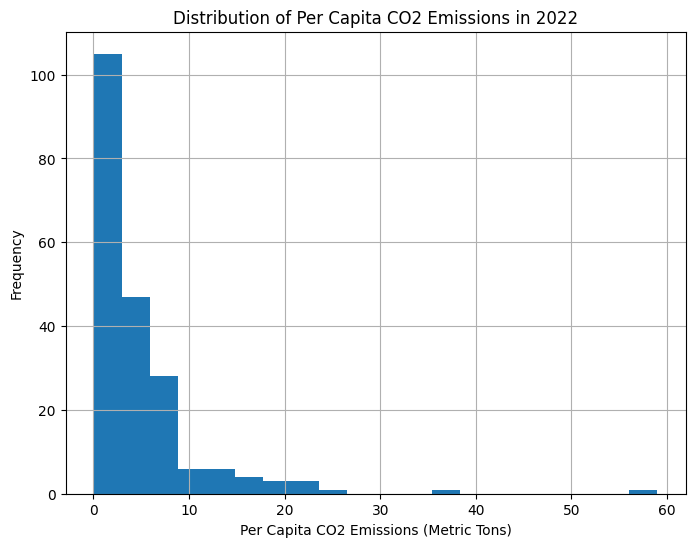

In [43]:
co2_emissions_df[['per_capita_co2_2022']].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Per Capita CO2 Emissions in 2022')
plt.xlabel('Per Capita CO2 Emissions (Metric Tons)')
plt.ylabel('Frequency')
plt.show()


The histogram visualizes the distribution of per capita CO2 emissions in 2022. The x-axis represents the range of emissions, and the y-axis shows the frequency of countries falling into each range. This helps analyze the variation in individual emission levels, providing insights into global environmental impact and guiding sustainable policies.

_____

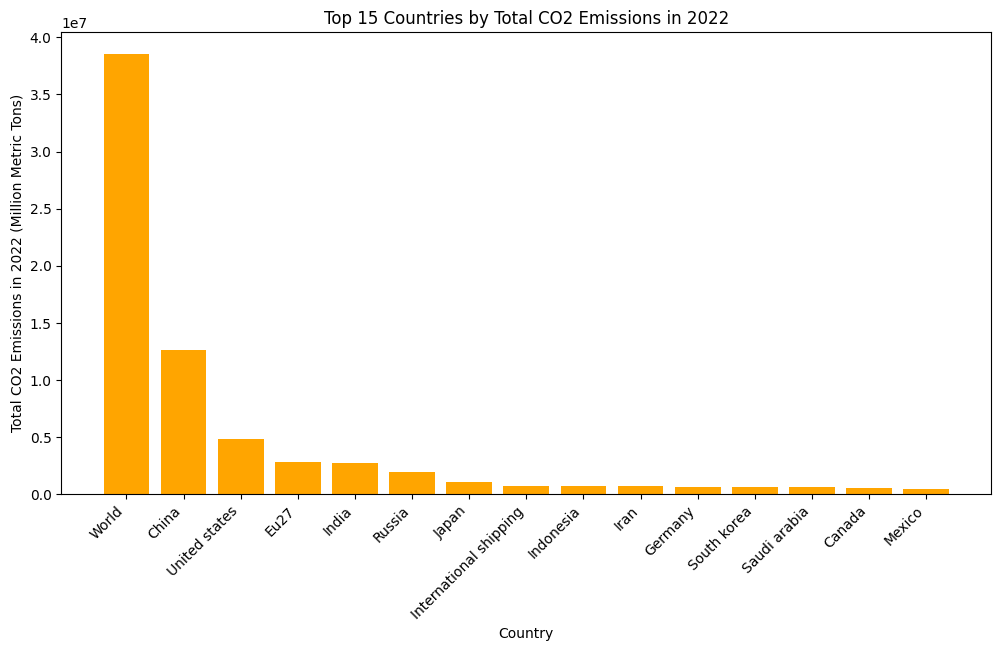

In [44]:
top_countries = co2_emissions_df.nlargest(15, 'fossil_CO2_emissions_2022')
plt.figure(figsize=(12, 6))
plt.bar(top_countries['country/territory'], top_countries['fossil_CO2_emissions_2022'] , color="orange")
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions in 2022 (Million Metric Tons)')
plt.title('Top 15 Countries by Total CO2 Emissions in 2022')
plt.xticks(rotation=45, ha='right')
plt.show()

This bar plot illustrates the top 15 countries by their total CO2 emissions in 2022. Each bar represents a country, and the height of the bar corresponds to its emissions. The purpose is to visually compare and identify the countries with the highest emissions, providing insights into global carbon output.

____

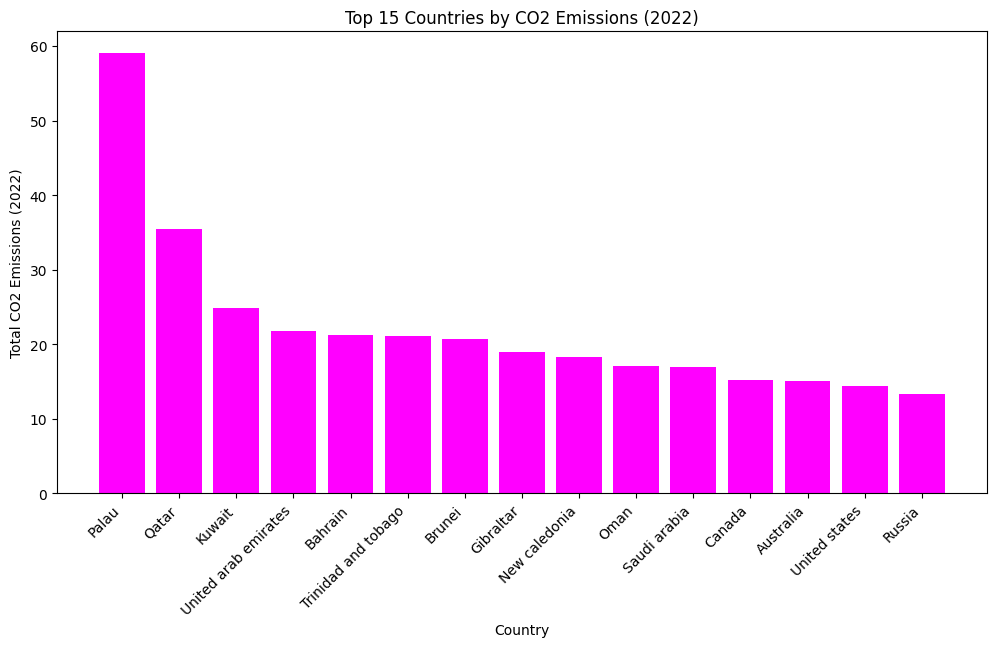

In [45]:
top_countries = co2_emissions_df.sort_values(by='per_capita_co2_2022', ascending=False).head(15)
plt.figure(figsize=(12, 6))
plt.bar(top_countries['country/territory'], top_countries['per_capita_co2_2022'] , color ="magenta")
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (2022)')
plt.title('Top 15 Countries by CO2 Emissions (2022)')
plt.xticks(rotation=45, ha='right')
plt.show()



The bar chart displays the top 15 countries with the highest per capita CO2 emissions in 2022. Each bar represents a country, and its height indicates the amount of CO2 emitted per person. The magenta color emphasizes the data. This visualization helps identify countries contributing the most to per capita carbon emissions.

____

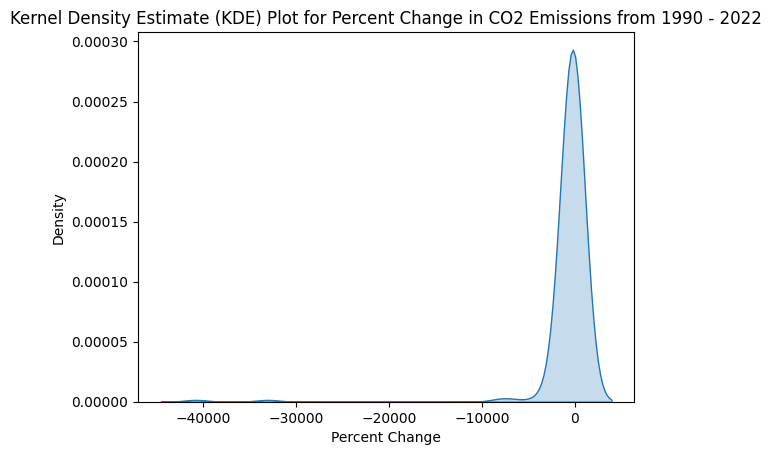

In [46]:
sns.kdeplot(data=co2_emissions_df, x='percent_change', fill=True, common_norm=False)
plt.title('Kernel Density Estimate (KDE) Plot for Percent Change in CO2 Emissions from 1990 - 2022')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.show()

The Kernel Density Estimate (KDE) plot visualizes the distribution of percent changes in CO2 emissions from 1990 to 2022. It displays the likelihood of observing different percent changes, providing insights into the data's distribution. This helps identify patterns, such as concentration around specific values, helping environmental trend analysis.

____

In [47]:
def update_plot(selected_country):
    country_data = co2_emissions_df[co2_emissions_df['country/territory'] == selected_country]
    plt.figure(figsize=(12, 6))
    plt.plot(country_data.columns[1:6], country_data.iloc[0, 1:6], marker='o')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (Million Metric Tons)')
    plt.title(f'CO2 Emissions Over Time for {selected_country}')
    plt.show()

country_names = co2_emissions_df['country/territory'].tolist()

country_dropdown = widgets.Dropdown(
    options=country_names,
    value='United states',  # Default selected country
    description='Select Country:',
    disabled=False,
    layout={'width': '300px'},
    style={'description_width': 'initial'}
)

output = interactive_output(update_plot, {'selected_country': country_dropdown})

widgets.VBox([country_dropdown, output])

The line plot displays the annual CO2 emissions in million metric tons for a selected country over five years. Each point on the line represents the emissions for a specific year. This visualization helps observe trends and fluctuations in a country's carbon footprint, providing valuable insights into its environmental impact. The dropdown menu allows users to choose different countries for comparison, facilitating a better understanding of global carbon emission patterns.

____

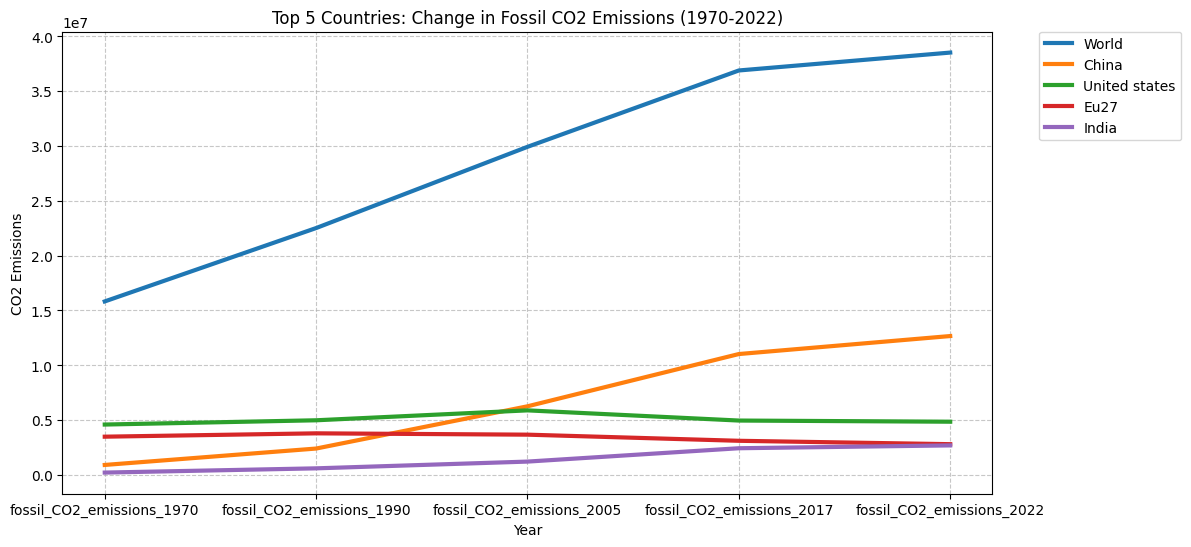

In [48]:
top_countries = co2_emissions_df.nlargest(5, 'fossil_CO2_emissions_2022')

plt.figure(figsize=(12, 6))

for country in top_countries['country/territory']:
    country_data = co2_emissions_df[co2_emissions_df['country/territory'] == country]
    plt.plot(country_data.columns[1:6], country_data.iloc[0, 1:6], label=country, linewidth=3)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Top 5 Countries: Change in Fossil CO2 Emissions (1970-2022)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='medium')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


This line plot compares the change in fossil CO2 emissions from 1970 to 2022 for the top 5 countries. Each country has a distinct line, showcasing its emissions trend over time. This visualization helps identify patterns and variations in carbon emissions, crucial for understanding environmental impacts and policy assessments.

____

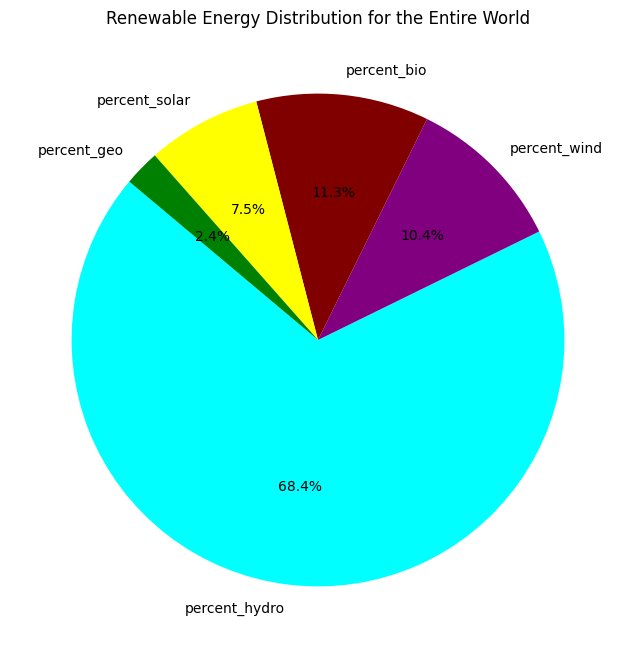

In [49]:
custom_colors = ['cyan', 'purple', 'maroon', 'yellow', 'green']

world_total_distribution = renewable_energy_df.iloc[:, 3:].sum()

plt.figure(figsize=(8, 8))
plt.pie(world_total_distribution, labels=renewable_energy_df.columns[3:], autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Renewable Energy Distribution for the Entire World')
plt.show()

The pie chart illustrates the global distribution of renewable energy sources, represented by different colors. Each color corresponds to a specific type of renewable energy, such as solar, wind, and hydropower. The chart provides a visual breakdown of the contribution of each energy source to the total renewable energy production worldwide. This helps us understand the relative importance of each source in our efforts to use sustainable and environmentally friendly energy.

___

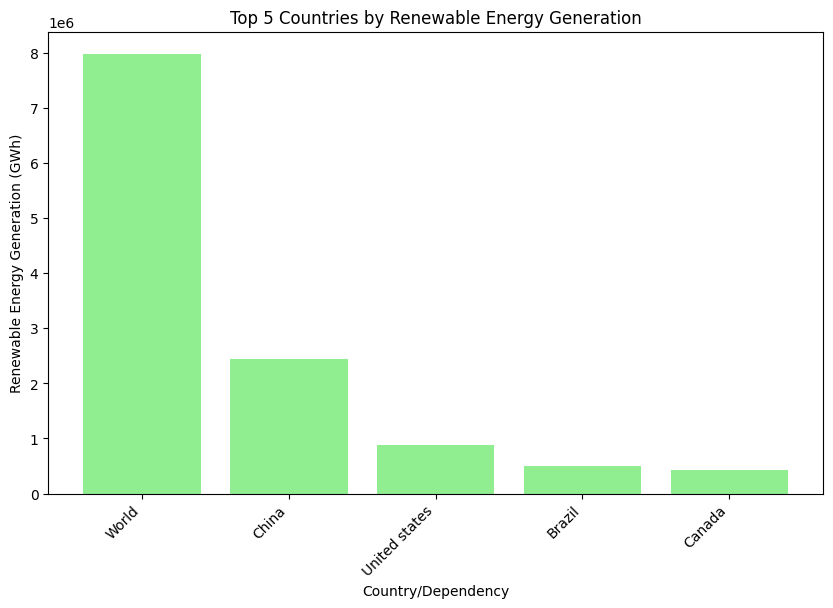

In [50]:
top_countries_renewable_generation = renewable_energy_df.nlargest(5, 'renewable_generation(GWh)')
plt.figure(figsize=(10, 6))
plt.bar(top_countries_renewable_generation['country/dependency'], top_countries_renewable_generation['renewable_generation(GWh)'], color='lightgreen')
plt.xlabel('Country/Dependency')
plt.ylabel('Renewable Energy Generation (GWh)')
plt.title('Top 5 Countries by Renewable Energy Generation')
plt.xticks(rotation=45, ha='right')
plt.show()


This bar plot displays the top 5 countries/dependencies with the highest renewable energy generation (in gigawatt-hours). Each bar represents a country, and the bar's height indicates the amount of renewable energy it produces. We use this plot to easily compare and identify the leading contributors to global renewable energy production. It helps visualize which regions are making significant strides in sustainable energy generation.

______

In [51]:
def update_plot(selected_energy_type):
    top_countries_energy_type = renewable_energy_df.nlargest(10, selected_energy_type)
    plt.figure(figsize=(12, 8))
    
    for country in top_countries_energy_type['country/dependency']:
        country_data = renewable_energy_df[renewable_energy_df['country/dependency'] == country]
        plt.bar(country_data['country/dependency'], country_data[selected_energy_type], label=country)
    
    plt.xlabel('Country/Dependency')
    plt.ylabel(f'Percentage of {selected_energy_type} Energy')
    plt.title(f'Top 10 Countries by {selected_energy_type} Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

energy_types = ['percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar', 'percent_geo']

energy_type_dropdown = widgets.Dropdown(
    options=energy_types,
    value='percent_solar',  # Default selected energy type
    description='Select Energy Type:',
    disabled=False,
    layout={'width': '300px'},
    style={'description_width': 'initial'}
)

output = interactive_output(update_plot, {'selected_energy_type': energy_type_dropdown})

widgets.VBox([energy_type_dropdown, output])

The bar plot displays the top 10 countries/dependencies based on their percentage of renewable energy in a selected category like solar, wind, bio, hydro, or geo. Each bar represents a country, and its height shows the percentage of renewable energy in that category. This visualization helps compare and identify leading countries in different renewable energy sources, providing insights into global sustainability efforts and energy diversity.

___

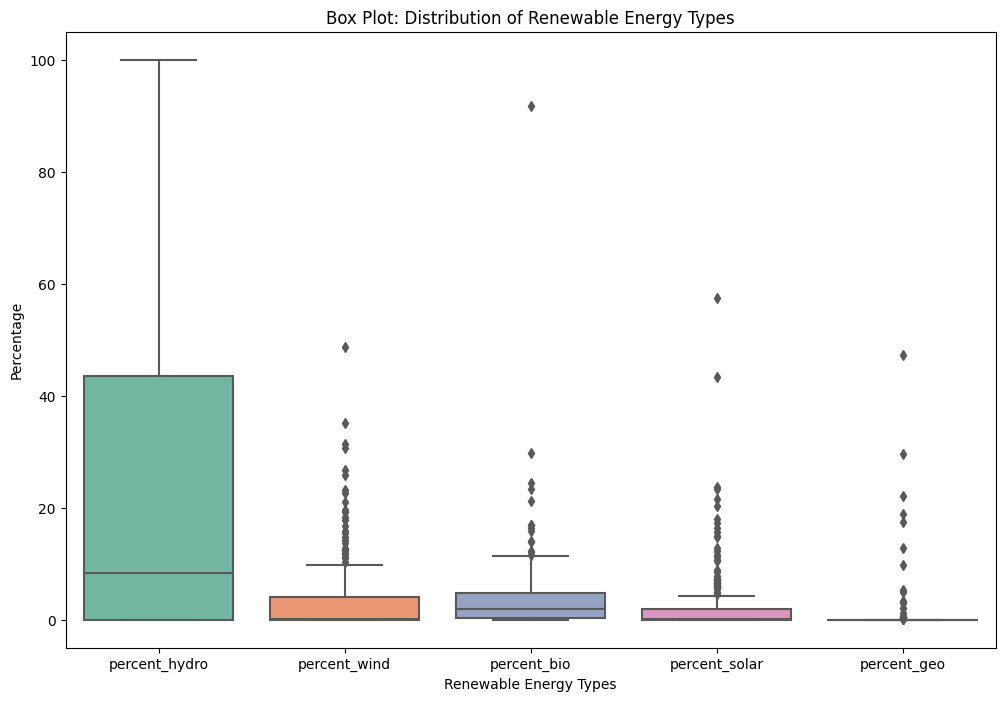

In [52]:
data = renewable_energy_df[['percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar', 'percent_geo']]
plt.figure(figsize=(12, 8))

sns.boxplot(data=data, palette="Set2")

plt.title('Box Plot: Distribution of Renewable Energy Types')
plt.xlabel('Renewable Energy Types')
plt.ylabel('Percentage')
plt.show()

The box plot illustrates the distribution of renewable energy types—hydro, wind, bio, solar, and geothermal. Each box represents the range of values for a specific energy type. The box's height indicates the interquartile range (IQR), showcasing where most data lies. Outliers, if any, are displayed as individual points. This plot helps us understand the variability and central tendency of each renewable energy source, aiding in effective analysis and comparison.

___

## Clustering

In [53]:
#importing libraries 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.decomposition import PCA

In [54]:
numeric_columns = ['percent_renewable', 'renewable_generation(GWh)', 'percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar', 'percent_geo']
data_for_clustering = renewable_energy_df[numeric_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_columns)

scaled_data_df.head()

,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo
0,2.035369,-0.098981,2.349186,0.219301,-0.498836,-0.395989,-0.185433
1,2.035369,-0.107899,2.532218,-0.517883,-0.525367,-0.411705,-0.185433
2,2.035369,-0.111221,2.515579,-0.517883,-0.459039,-0.411705,-0.185433
3,2.035369,-0.127225,2.488956,-0.333587,-0.525367,-0.411705,-0.185433
4,2.035369,-0.054282,2.508923,-0.517883,-0.525367,-0.301695,-0.185433


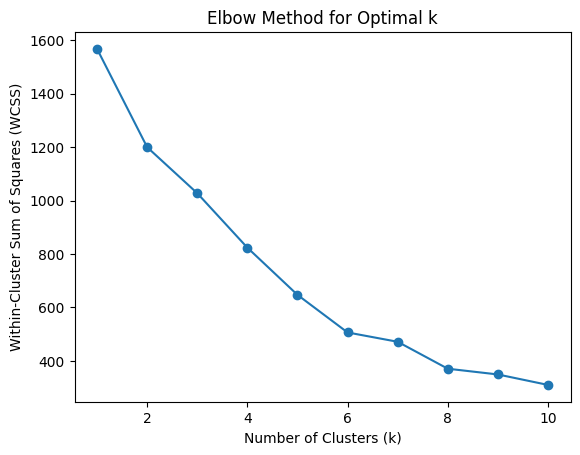

In [55]:
numeric_columns = ['percent_renewable', 'renewable_generation(GWh)', 'percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar', 'percent_geo']
data_for_clustering = renewable_energy_df[numeric_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

wcss = [] 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Elbow curve plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

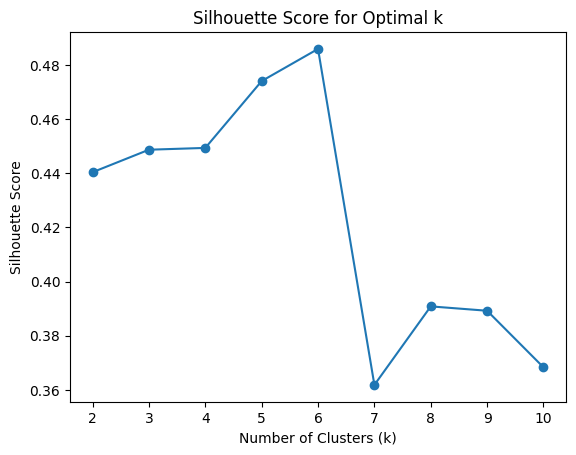

In [56]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

From elbow method and silhouette score we observe that k=6 is optimal number of k

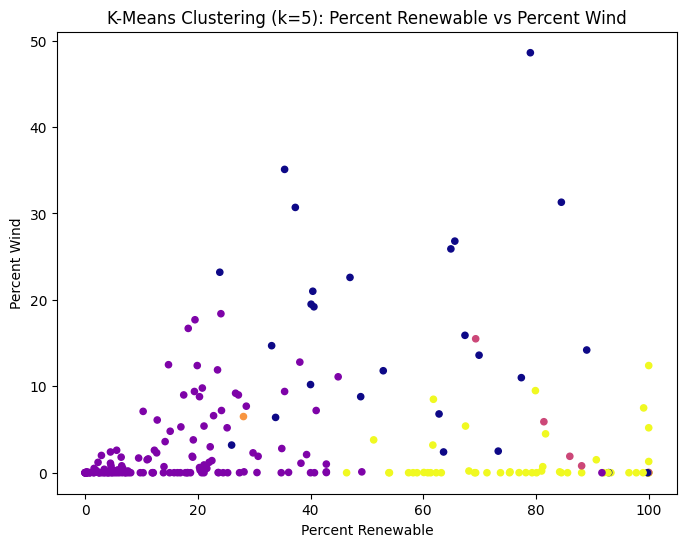

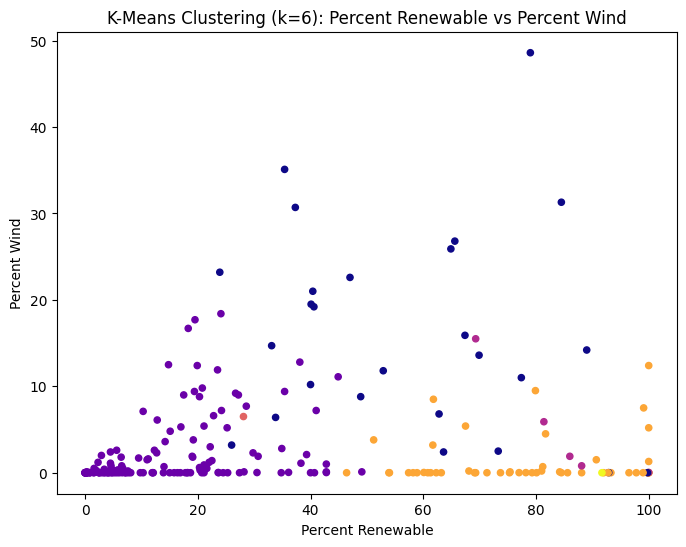

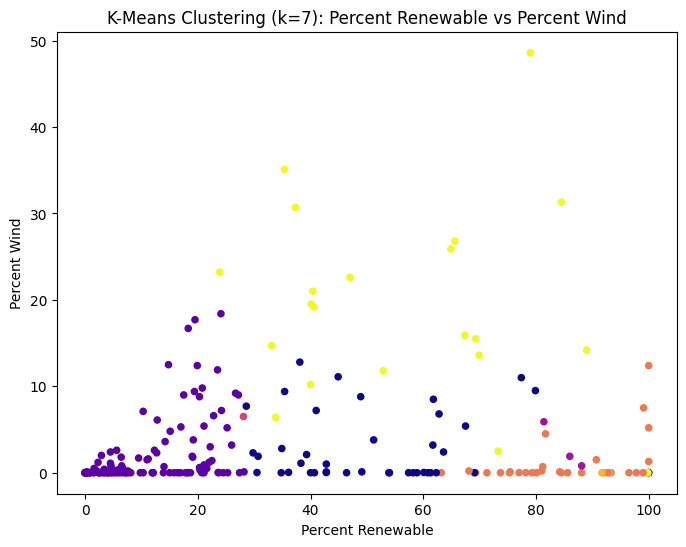

In [57]:
numeric_columns_renewable = renewable_energy_df.select_dtypes(include=['float64']).columns
data_for_clustering_renewable = renewable_energy_df[numeric_columns_renewable]

scaler_renewable = StandardScaler()
scaled_data_renewable = scaler_renewable.fit_transform(data_for_clustering_renewable)

# We are trying for different values of k
for k in [5, 6, 7]:
    kmeans_renewable = KMeans(n_clusters=k, random_state=42)
    renewable_energy_df['cluster'] = kmeans_renewable.fit_predict(scaled_data_renewable)

    # Plot clusters based on percent_renewable and percent_wind
    plt.figure(figsize=(8, 6))
    plt.scatter(renewable_energy_df['percent_renewable'], renewable_energy_df['percent_wind'], c=renewable_energy_df['cluster'], cmap='plasma', s=20)
    plt.title(f'K-Means Clustering (k={k}): Percent Renewable vs Percent Wind')
    plt.xlabel('Percent Renewable')
    plt.ylabel('Percent Wind')
    plt.show()

### Hierarchical Clustering

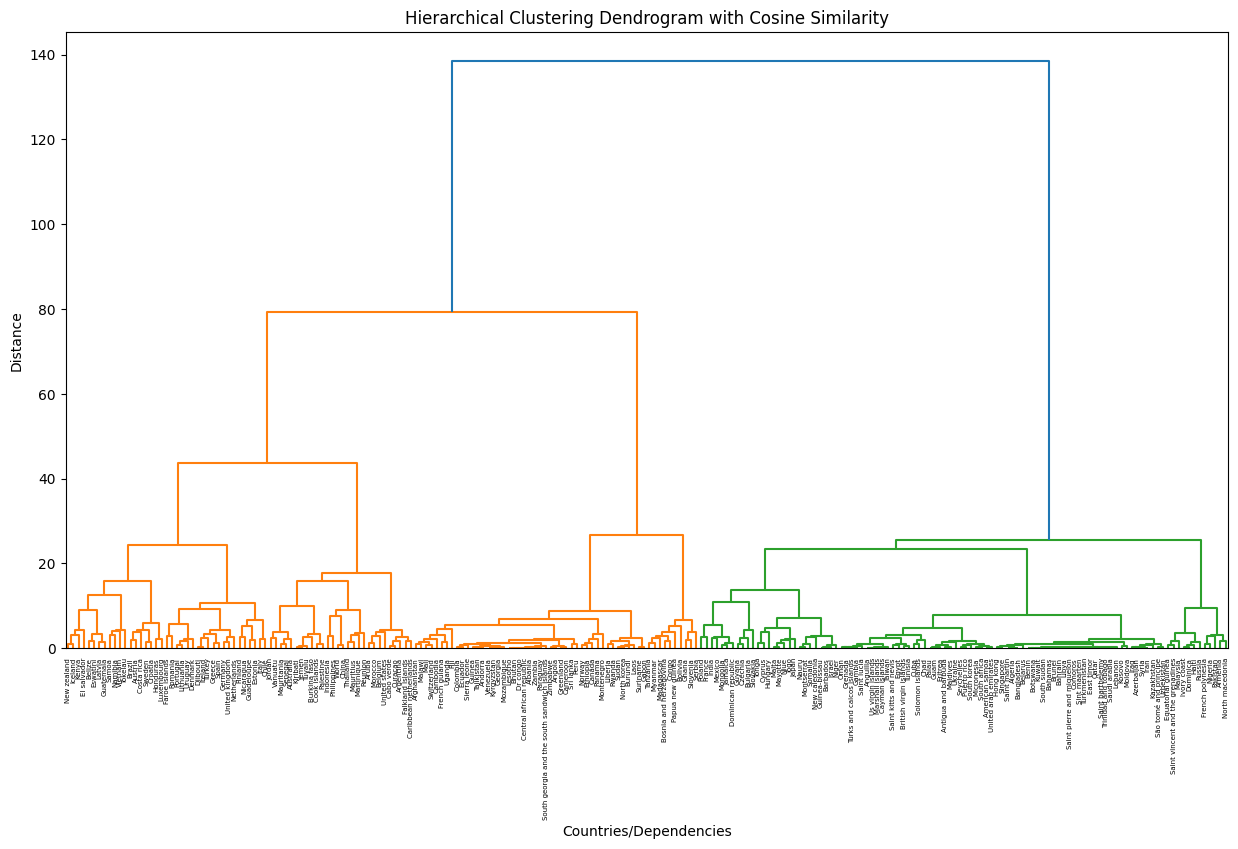

In [58]:
numeric_columns_renewable = renewable_energy_df.select_dtypes(include=['float64']).columns
data_for_clustering_renewable = renewable_energy_df[numeric_columns_renewable]

scaler_renewable = StandardScaler()
scaled_data_renewable = scaler_renewable.fit_transform(data_for_clustering_renewable)

# cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(scaled_data_renewable)

# linkage matrix using cosine similarity
linkage_matrix_cosine = linkage(1 - cosine_similarity_matrix, method='ward')

# Dendrogram plot
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix_cosine, labels=renewable_energy_df['country/dependency'].tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram with Cosine Similarity')
plt.xlabel('Countries/Dependencies')
plt.ylabel('Distance')
plt.show()

From above Dendrogram we can observe the luisters formed using hierarchical clustering

### PCA

In [59]:
# PCA to get eigenvalues and eigenvectors
pca = PCA()
pca.fit(scaled_data)

PCA()

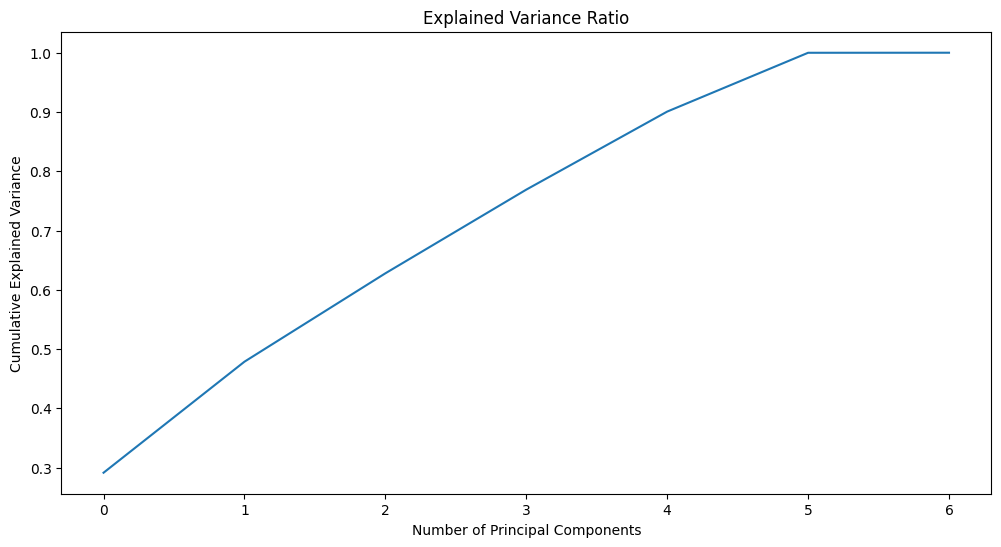

In [60]:
# Plot explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

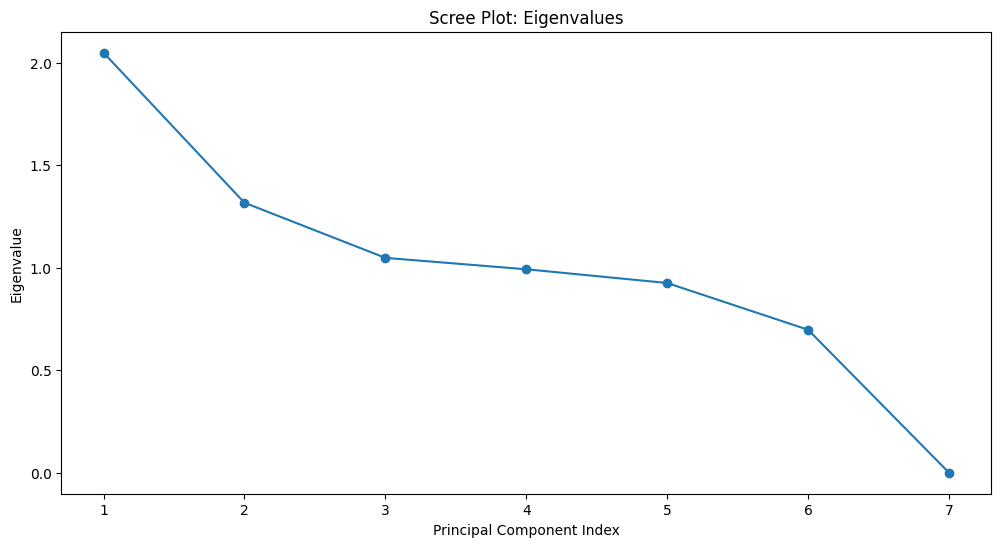

In [61]:
# Plot the eigenvalues
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot: Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.show()

In [62]:
renewable_energy_df.head()

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo,cluster
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0,4
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0,4
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0,4
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0,4
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0,4


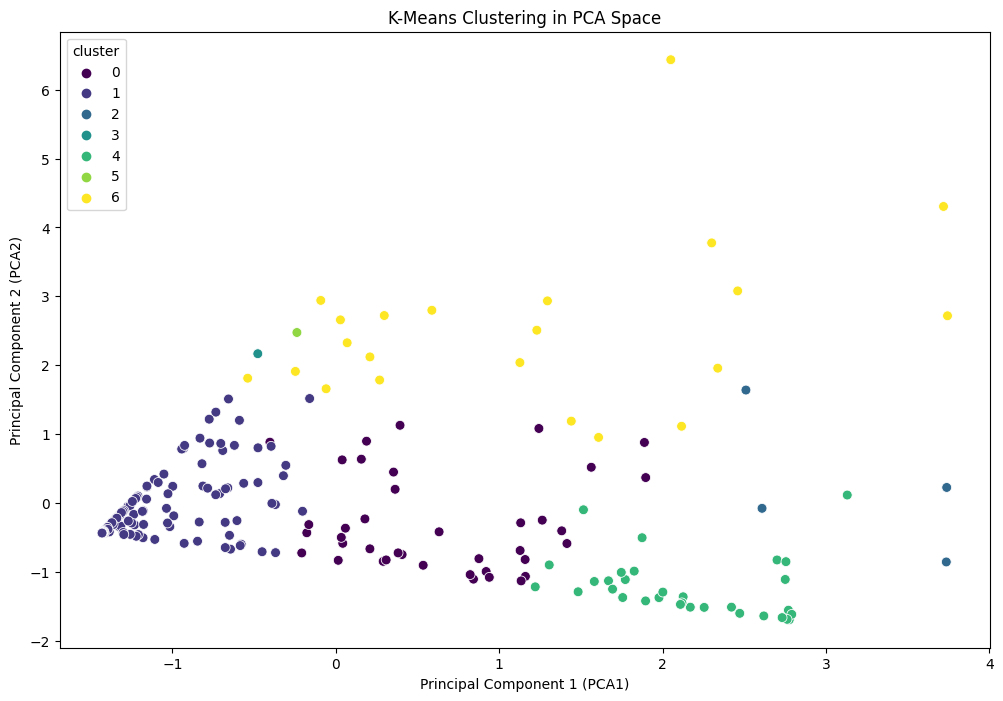

In [63]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

renewable_energy_df['PCA1'] = pca_result[:, 0]
renewable_energy_df['PCA2'] = pca_result[:, 1]

# Clusters in PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=renewable_energy_df, palette='viridis', s=50)
plt.title('K-Means Clustering in PCA Space')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.show()


In [64]:
renewable_energy_df.head()

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo,cluster,PCA1,PCA2
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0,4,2.750493,-1.110599
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0,4,2.775093,-1.695347
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0,4,2.760599,-1.673606
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0,4,2.770046,-1.556768
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0,4,2.790442,-1.617285


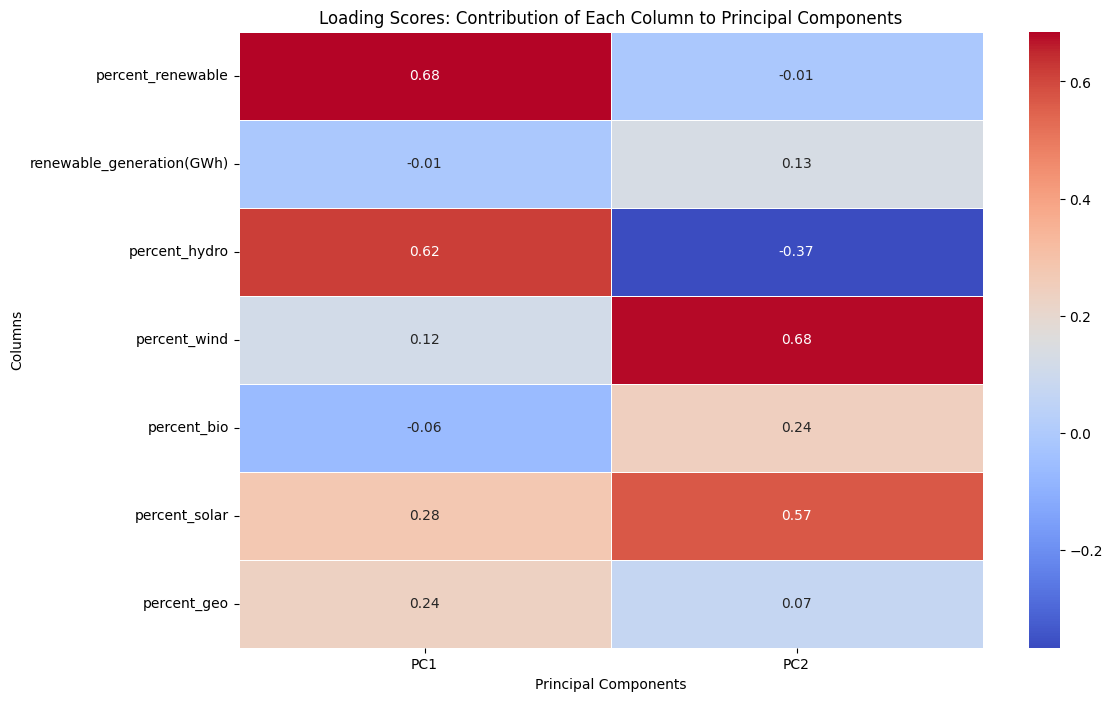

In [65]:
# loading scores
loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=data_for_clustering.columns)

plt.figure(figsize=(12, 8))
sns.heatmap(loading_scores, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Loading Scores: Contribution of Each Column to Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Columns')
plt.show()

In [66]:
data_for_clustering.head()

,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo
0,100.0,15817.0,94.5,5.2,0.2,0.1,0.0
1,100.0,10823.0,100.0,0.0,0.0,0.0,0.0
2,100.0,8963.0,99.5,0.0,0.5,0.0,0.0
3,100.0,0.8,98.7,1.3,0.0,0.0,0.0
4,100.0,40848.0,99.3,0.0,0.0,0.7,0.0


In [67]:
renewable_energy_df_clustering = renewable_energy_df.copy()

# Remove the specified columns from renewable_energy_df_clustering
columns_to_remove = ['cluster', 'PCA1', 'PCA2']
renewable_energy_df.drop(columns=columns_to_remove, inplace=True)

# Check the result
renewable_energy_df.head()


,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0


## Naïve Bayes

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [69]:
renewable_energy_df.head()

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0


In [70]:
# Define the bins and labels for the categories
bins = [-1, 25, 50, 75, 100]
labels = [-2 , -1 , 1, 2]

renewable_energy_df_classified = renewable_energy_df.copy()

# Create a new column with the categories
renewable_energy_df_classified['renewable_category'] = pd.cut(renewable_energy_df['percent_renewable'], bins=bins, labels=labels, include_lowest=True)

renewable_energy_df_classified.head()

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo,renewable_category
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0,2
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0,2
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0,2
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0,2
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0,2


In [71]:
for col in ['percent_hydro', 'percent_wind', 'percent_bio', 'percent_solar', 'percent_geo']:
    threshold = renewable_energy_df[col].median()  
    renewable_energy_df_classified[f'{col}_category'] = renewable_energy_df[col].apply(lambda x: -1 if x <= threshold else 1)

renewable_energy_df_classified.head()                                                                                                                                                                                        

,country/dependency,percent_renewable,renewable_generation(GWh),percent_hydro,percent_wind,percent_bio,percent_solar,percent_geo,renewable_category,percent_hydro_category,percent_wind_category,percent_bio_category,percent_solar_category,percent_geo_category
0,Ethiopia,100.0,15817.0,94.5,5.2,0.2,0.1,0.0,2,1,1,-1,-1,-1
1,Bhutan,100.0,10823.0,100.0,0.0,0.0,0.0,0.0,2,1,-1,-1,-1,-1
2,Albania,100.0,8963.0,99.5,0.0,0.5,0.0,0.0,2,1,-1,-1,-1,-1
3,South georgia and the south sandwich islands,100.0,0.8,98.7,1.3,0.0,0.0,0.0,2,1,1,-1,-1,-1
4,Paraguay,100.0,40848.0,99.3,0.0,0.0,0.7,0.0,2,1,-1,-1,1,-1


In [72]:
selected_columns = ['country/dependency', 'renewable_category', 'percent_hydro_category', 
                    'percent_wind_category', 'percent_bio_category', 'percent_solar_category', 
                    'percent_geo_category']

# Create a new DataFrame with only the selected columns
renewable_energy_df_classified = renewable_energy_df_classified[selected_columns]

renewable_energy_df_classified.head()

,country/dependency,renewable_category,percent_hydro_category,percent_wind_category,percent_bio_category,percent_solar_category,percent_geo_category
0,Ethiopia,2,1,1,-1,-1,-1
1,Bhutan,2,1,-1,-1,-1,-1
2,Albania,2,1,-1,-1,-1,-1
3,South georgia and the south sandwich islands,2,1,1,-1,-1,-1
4,Paraguay,2,1,-1,-1,1,-1


In [73]:
for col in renewable_energy_df_classified.columns:
    if col.endswith('_category'):
        print(renewable_energy_df_classified[col].value_counts())

renewable_category
-2    118
2      40
-1     38
1      28
Name: count, dtype: int64
percent_hydro_category
 1    112
-1    112
Name: count, dtype: int64
percent_wind_category
-1    115
 1    109
Name: count, dtype: int64
percent_bio_category
-1    115
 1    109
Name: count, dtype: int64
percent_solar_category
-1    115
 1    109
Name: count, dtype: int64
percent_geo_category
-1    199
 1     25
Name: count, dtype: int64


In [74]:
# Data Preparation
X = renewable_energy_df_classified[['percent_hydro_category', 'percent_wind_category', 'percent_bio_category', 'percent_solar_category', 'percent_geo_category']]
y = renewable_energy_df_classified['renewable_category']  # Replace 'target_variable' with the name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [75]:
X_train.head()

,percent_hydro_category,percent_wind_category,percent_bio_category,percent_solar_category,percent_geo_category
32,1,1,1,1,-1
99,1,1,1,1,1
101,1,1,-1,1,-1
21,1,1,1,1,1
26,1,-1,-1,-1,-1


In [76]:
X_test.head()

,percent_hydro_category,percent_wind_category,percent_bio_category,percent_solar_category,percent_geo_category
194,-1,-1,-1,1,-1
17,-1,-1,1,-1,-1
92,-1,1,1,1,1
66,1,1,-1,1,-1
44,1,-1,-1,-1,-1


In [77]:
y_train.head()

32     2
99    -1
101   -1
21     2
26     2
Name: renewable_category, dtype: category
Categories (4, int64): [-2 < -1 < 1 < 2]

In [78]:
y_test.head()

194   -2
17     2
92    -1
66     1
44     1
Name: renewable_category, dtype: category
Categories (4, int64): [-2 < -1 < 1 < 2]

In [79]:
#Model Training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7111111111111111
Classification Report:
              precision    recall  f1-score   support

          -2       0.89      0.92      0.91        26
          -1       1.00      0.25      0.40         4
           1       0.22      0.50      0.31         4
           2       0.62      0.45      0.53        11

    accuracy                           0.71        45
   macro avg       0.68      0.53      0.53        45
weighted avg       0.78      0.71      0.71        45



In [80]:
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_nb)

Confusion Matrix:
[[24  0  2  0]
 [ 1  1  1  1]
 [ 0  0  2  2]
 [ 2  0  4  5]]


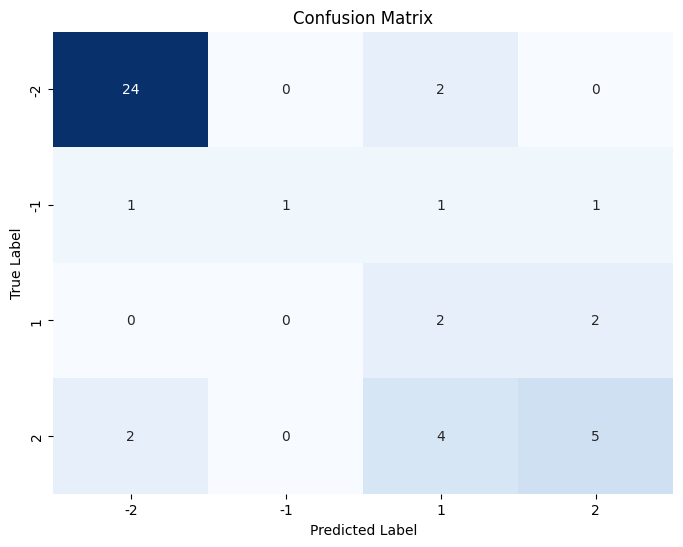

In [81]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['-2', '-1', '1', '2'], yticklabels=['-2', '-1', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Decision Trees

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data Preparation
X = renewable_energy_df_classified.drop(columns=['country/dependency', 'renewable_category'])
y = renewable_energy_df_classified['renewable_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [83]:
X_train.head()

,percent_hydro_category,percent_wind_category,percent_bio_category,percent_solar_category,percent_geo_category
32,1,1,1,1,-1
99,1,1,1,1,1
101,1,1,-1,1,-1
21,1,1,1,1,1
26,1,-1,-1,-1,-1


In [84]:
X_test.head()

,percent_hydro_category,percent_wind_category,percent_bio_category,percent_solar_category,percent_geo_category
194,-1,-1,-1,1,-1
17,-1,-1,1,-1,-1
92,-1,1,1,1,1
66,1,1,-1,1,-1
44,1,-1,-1,-1,-1


In [85]:
y_train.head()

32     2
99    -1
101   -1
21     2
26     2
Name: renewable_category, dtype: category
Categories (4, int64): [-2 < -1 < 1 < 2]

In [86]:
y_test.head()

194   -2
17     2
92    -1
66     1
44     1
Name: renewable_category, dtype: category
Categories (4, int64): [-2 < -1 < 1 < 2]

In [87]:

#Model Training
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6444444444444445
Classification Report:
              precision    recall  f1-score   support

          -2       0.86      0.92      0.89        26
          -1       0.14      0.25      0.18         4
           1       0.00      0.00      0.00         4
           2       0.57      0.36      0.44        11

    accuracy                           0.64        45
   macro avg       0.39      0.38      0.38        45
weighted avg       0.65      0.64      0.64        45



In [88]:
conf_matrix_dc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_dc)

Confusion Matrix:
[[24  1  1  0]
 [ 2  1  0  1]
 [ 0  2  0  2]
 [ 2  3  2  4]]


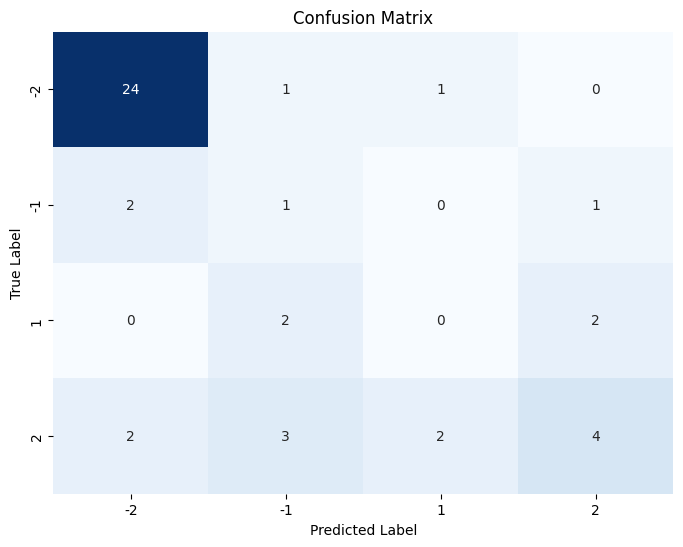

In [89]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dc, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['-2', '-1', '1', '2'], yticklabels=['-2', '-1', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

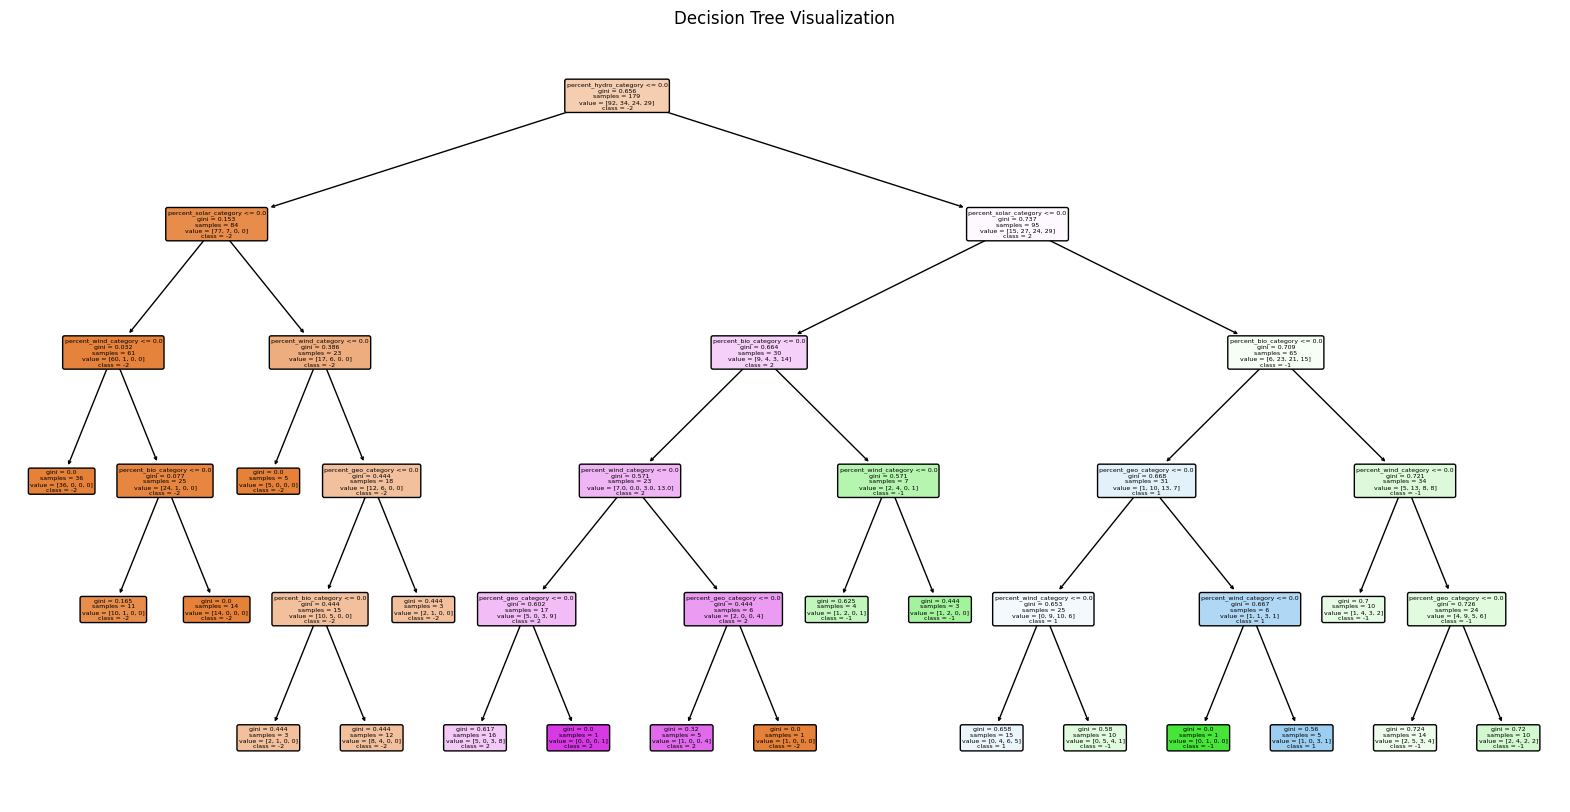

In [90]:
from sklearn.tree import plot_tree
# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['-2' ,'-1','1' , '2'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()